In [1]:
using QuantumOptics
using PyPlot

/home/hhs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
N = 100
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb';

In [3]:
Nparticles = 2
b_mb = ManyBodyBasis(b, fermionstates(b, Nparticles));

In [4]:
b_mb.occupations;

In [5]:
H_mb = manybodyoperator(b_mb, Htb);
Emb, Umb = eigenstates(dense(H_mb));
Emb

4950-element Vector{Float64}:
 -3.9980262414629255
 -3.9901370499376227
 -3.9901370499376227
 -3.9901370499376227
 -3.9901370499376227
 -3.98224785841232
 -3.974389801921739
 -3.974389801921739
 -3.974389801921739
 -3.974389801921739
 -3.9665006103964355
 -3.9665006103964355
 -3.9665006103964355
  ⋮
  3.966500610396435
  3.9665006103964364
  3.9743898019217387
  3.9743898019217387
  3.9743898019217387
  3.9743898019217387
  3.98224785841232
  3.9901370499376236
  3.9901370499376236
  3.9901370499376236
  3.9901370499376236
  3.9980262414629264

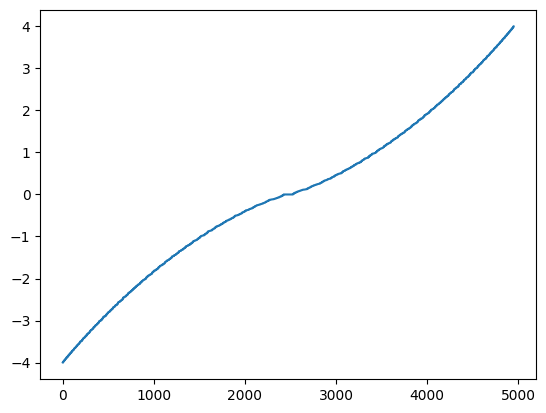

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c31fa0070>

In [6]:
plot(Emb)